## Python e OpenCV
**Checkpoint 2 - 2TDSF**

* Gabriel de Nicola Gonçalves RM 88803
* Gustavo de Souza Nascimento RM 88804
* João Victor Deziderio       RM 88805
* Nathan Pagliari Augusto     RM 88806

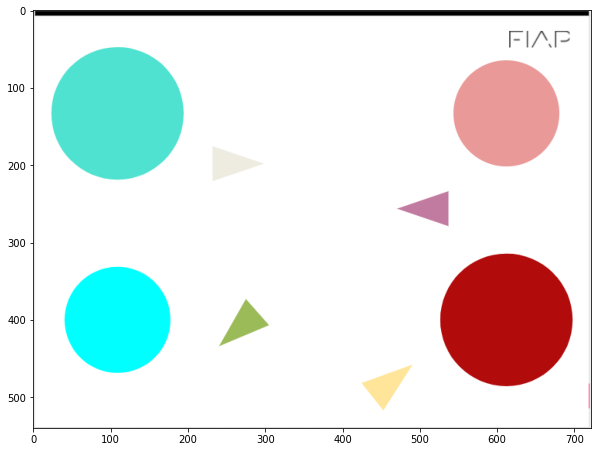

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('circulo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img); plt.show()

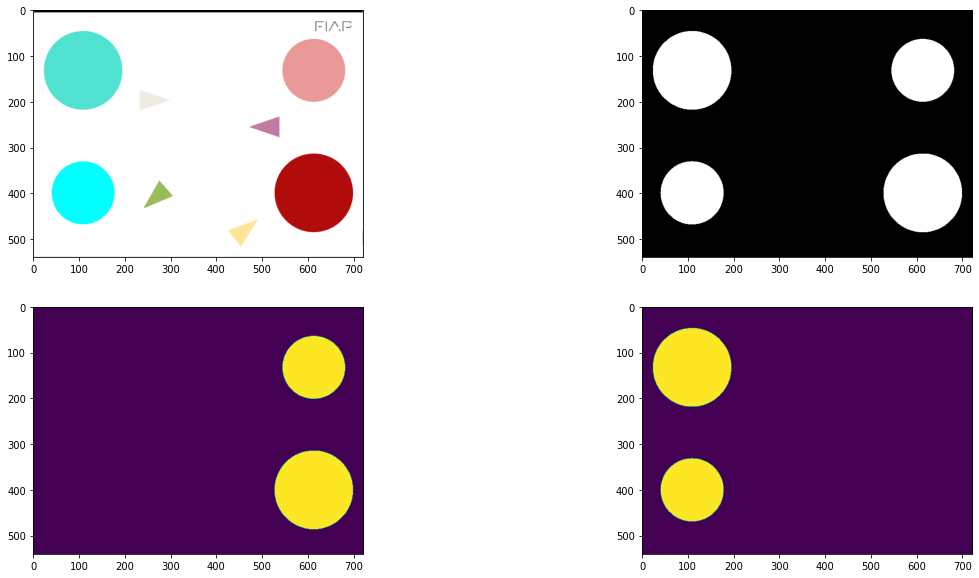

In [3]:
img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

image_lower_hsv1 = np.array([0, 50, 100])  
image_upper_hsv1 = np.array([10, 255, 255])

mask_hsv1 = cv2.inRange(img_hsv, image_lower_hsv1, image_upper_hsv1)

image_lower_hsv2 = np.array([80, 50, 100])  
image_upper_hsv2 = np.array([105, 255, 255])

mask_hsv2 = cv2.inRange(img_hsv, image_lower_hsv2, image_upper_hsv2)

saida = cv2.bitwise_or(mask_hsv1,mask_hsv2)


fig = plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.subplot(2, 2, 2)
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.subplot(2, 2, 3)
plt.imshow(mask_hsv1)
plt.subplot(2, 2, 4)
plt.imshow(mask_hsv2)
plt.show()

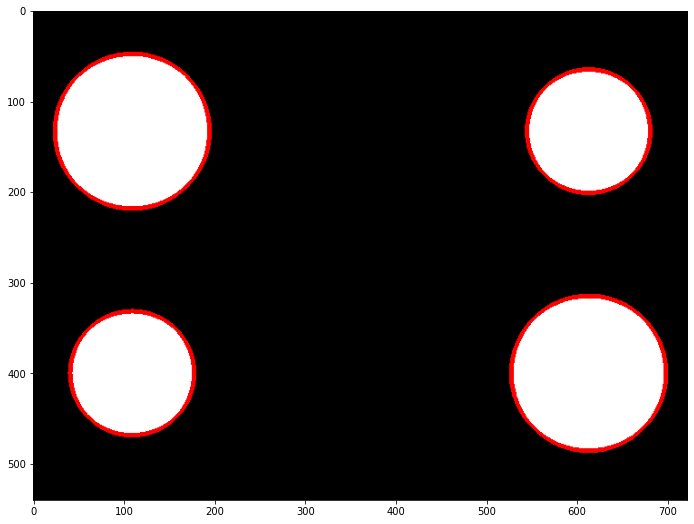

In [4]:
contornos, _ = cv2.findContours(saida, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mask_rgb = cv2.cvtColor(saida, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() 
cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 3);
plt.figure(figsize=(12,9))
plt.imshow(contornos_img);

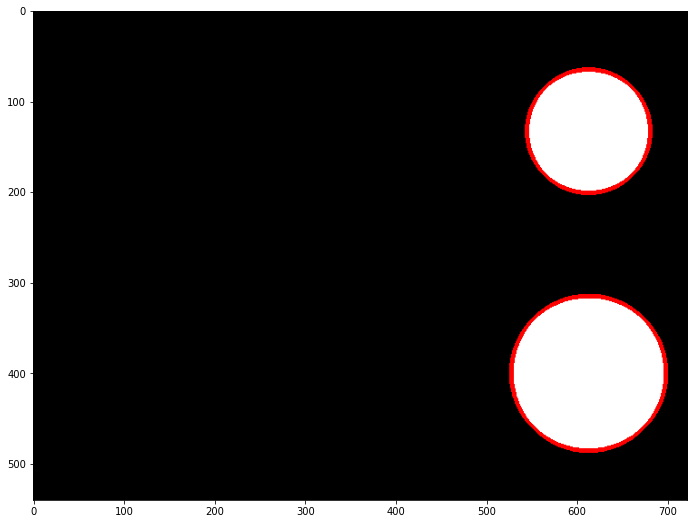

In [5]:
contornosRed, _ = cv2.findContours(mask_hsv1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
mask_rgb = cv2.cvtColor(mask_hsv1, cv2.COLOR_GRAY2RGB) 
contornos_img_red = mask_rgb.copy()
cv2.drawContours(contornos_img_red, contornosRed, -1, [255, 0, 0], 3);

plt.figure(figsize=(12,9))
plt.imshow(contornos_img_red);

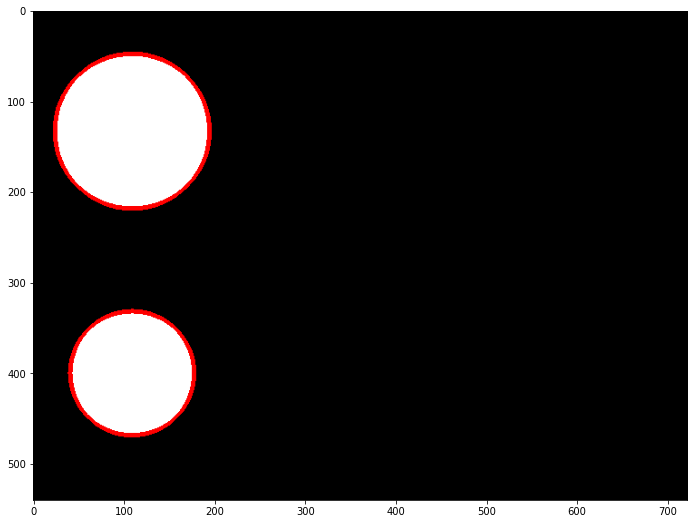

In [6]:
contornosCian, _ = cv2.findContours(mask_hsv2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(mask_hsv2, cv2.COLOR_GRAY2RGB) 
contornos_img_cian = mask_rgb.copy() 

cv2.drawContours(contornos_img_cian, contornosCian, -1, [255, 0, 0], 3);

plt.figure(figsize=(12,9))
plt.imshow(contornos_img_cian);

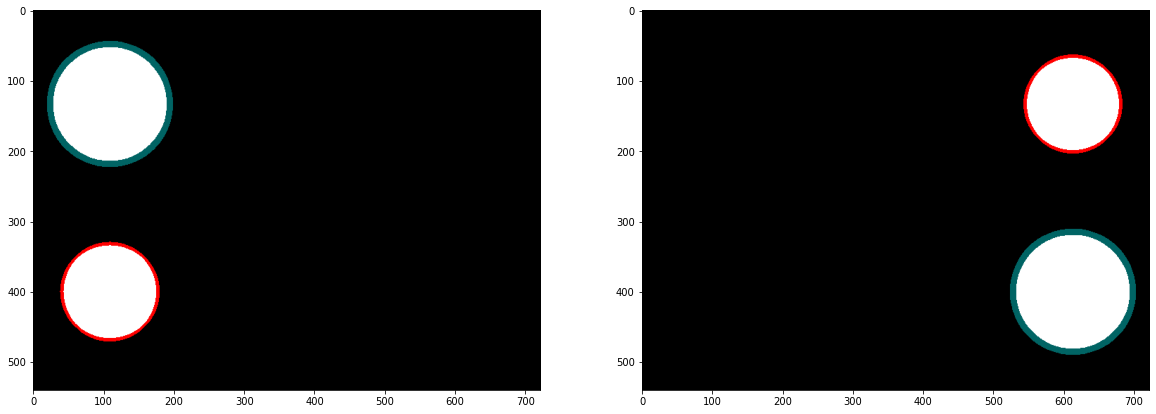

In [7]:
maior = None
maior_area = 0
maior2 = None
maior_area2 = 0
for c in contornosRed:
    area = cv2.contourArea(c)
    if area > maior_area:
        maior_area = area
        maior = c
for a in contornosCian:
    area = cv2.contourArea(a)
    if area > maior_area2:
        maior_area2 = area
        maior2 = a

cv2.drawContours(contornos_img_red, [maior], -1, [0, 100, 100], 8)
cv2.drawContours(contornos_img_cian, [maior2], -1, [0, 100, 100], 8)




fig = plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.imshow(contornos_img_cian)
plt.subplot(2, 2, 2)
plt.imshow(contornos_img_red)
plt.show()

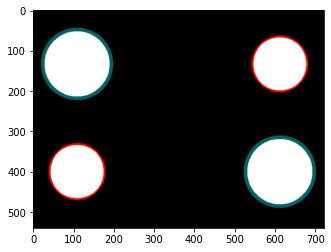

In [8]:
saida = cv2.bitwise_or(contornos_img_cian,contornos_img_red)
plt.imshow(saida)
plt.show()

In [9]:
cntCian = contornosCian[1]

MCian = cv2.moments(cntCian)

cntRed = contornosRed[0]

MRed = cv2.moments(cntRed)

cxRed = int(MRed['m10']/MRed['m00'])
cyRed = int(MRed['m01']/MRed['m00'])

cxCian = int(MCian['m10']/MCian['m00'])
cyCian = int(MCian['m01']/MCian['m00'])

In [10]:
print( MCian )
print( MRed)
print("centro de massa na possição: ",cxRed, cyRed)
print("centro de massa na possição: ",cxCian, cyCian)

{'m00': 22854.0, 'm10': 2487968.0, 'm01': 3040160.0, 'm20': 312423379.0, 'm11': 330959886.0, 'm02': 445973697.6666666, 'm30': 43063891216.0, 'm21': 41559564465.333336, 'm12': 48549019971.666664, 'm03': 70381693949.0, 'mu20': 41574303.60733348, 'mu11': -2781.1427320837975, 'mu02': 41555529.04848164, 'mu30': 513102.823638916, 'mu21': -40904.072379112244, 'mu12': -528396.1711006165, 'mu03': 40361.77864074707, 'nu20': 0.0795977033619422, 'nu11': -5.3247452148922754e-06, 'nu02': 0.07956175779853952, 'nu30': 6.4982863826728305e-06, 'nu21': -5.180372515823532e-07, 'nu12': -6.6919718331855504e-06, 'nu03': 5.111692714172176e-07}
{'m00': 22868.0, 'm10': 13996095.0, 'm01': 9142678.833333332, 'm20': 8607758663.666666, 'm11': 5595663851.75, 'm02': 3696885147.5, 'm30': 5319214073874.5, 'm21': 3441390568469.283, 'm12': 2262629794332.4165, 'm03': 1511306121138.35, 'mu20': 41610541.8796711, 'mu11': -7020.465431213379, 'mu02': 41621186.96644497, 'mu30': 404640.1806640625, 'mu21': -2488140.1535949707, 'm

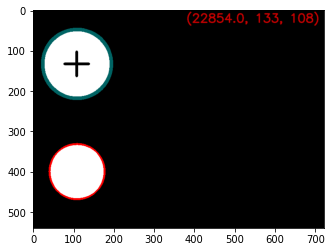

In [11]:
size = 30
color = (0,0,0)


cv2.line(contornos_img_cian,(cxCian - size,cyCian),(cxCian + size,cyCian),color,5)
cv2.line(contornos_img_cian,(cxCian,cyCian - size),(cxCian, cyCian + size),color,5)

font = cv2.FONT_HERSHEY_SIMPLEX
text = maior_area2, cyCian , cxCian
origem = (380,30)

cv2.putText(contornos_img_cian, str(text), origem, font,1,(200,0,0),2,cv2.LINE_AA)


plt.imshow(contornos_img_cian);

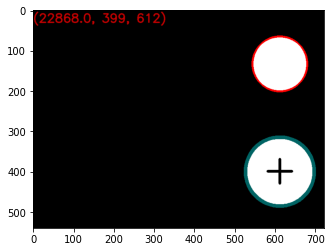

In [12]:
cv2.line(contornos_img_red,(cxRed - size,cyRed),(cxRed + size,cyRed),color,5)
cv2.line(contornos_img_red,(cxRed,cyRed - size),(cxRed, cyRed + size),color,5)

font = cv2.FONT_HERSHEY_SIMPLEX
text = maior_area, cyRed , cxRed
origem = (0,30)


cv2.putText(contornos_img_red, str(text), origem, font,1,(200,0,0),2,cv2.LINE_AA)


plt.imshow(contornos_img_red);

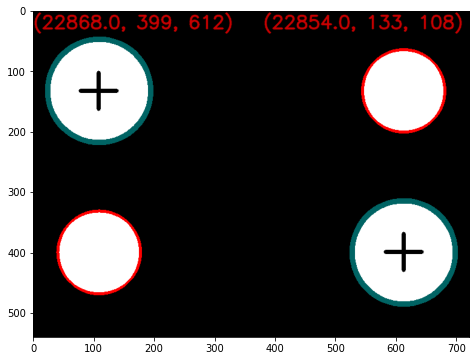

In [13]:
saida = cv2.bitwise_or(contornos_img_cian,contornos_img_red)
plt.figure(figsize=(8,6))
plt.imshow(saida)
plt.show()

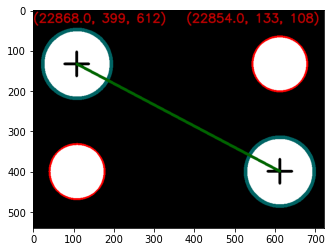

In [14]:
color = (0, 100, 0)

cv2.line(saida,(cxCian , cyCian),(cxRed , cyRed),color,5)
plt.imshow(saida)
plt.show()

In [15]:
y = cyRed-cyCian
x = cxRed-cxCian
angulo = math.atan2(y,x)
final= round(math.degrees(angulo),2)

print("Angulo da reta:", final)

Angulo da reta: 27.82


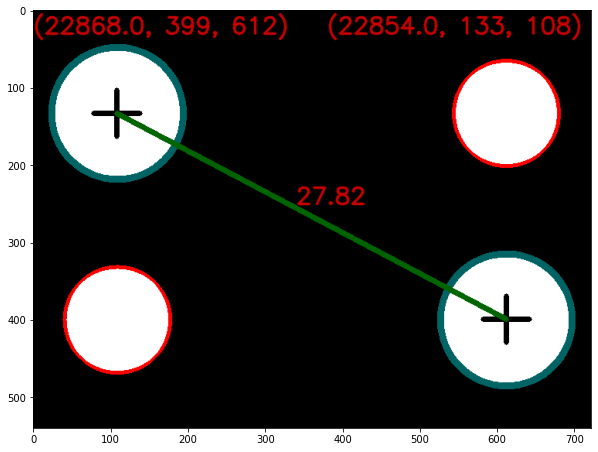

In [16]:
font = cv2.FONT_HERSHEY_SIMPLEX
text = final 
origem = (340,250)
cv2.putText(saida, str(text), origem, font,1,(200,0,0),2,cv2.LINE_AA)
cv2.line(saida,(cxCian , cyCian),(cxRed , cyRed),color,3)
fig = plt.figure(figsize=(10,10))
plt.imshow(saida)
plt.show()